In [1]:
import block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load a monodimensional array as input for the blocking function .
dataset = np.loadtxt('test_cv.dat')

In [4]:
# First of all we need to check the length of our dataset and how many block
# transformations we may get by blocking it.
dataset = block.check(dataset, multi=1) # With multi you can indicate how many replicas your dataset is made of.

Possible blocks transformations: 31
 no lenght correction needed



In [5]:
# It is possible to get a good number of block transformations from this dataset,
# so the check function will return the same starting dataset. Otherwise it would
# cut few point at the bottom of the dataset so that it is possible to have more block
# transformations.
#
# The blocking function returns a 3 columns array
blocks_stat = block.blocking(dataset)

# Printing blocking result as dataframe for a nicer view
pd.DataFrame(blocks_stat, columns=['Block Size', 'Std Error(Mean)', 'Std Error(Std Error)']).style.hide_index()

Block Size,Std Error(Mean),Std Error(Std Error)
1.000000,0.003520,0.000019
2.000000,0.004932,0.000038
4.000000,0.006799,0.000074
5.000000,0.007487,0.000091
8.000000,0.009029,0.000139
10.000000,0.009777,0.000168
17.000000,0.011282,0.000252
20.000000,0.012101,0.000294
25.000000,0.012275,0.000333
34.000000,0.013014,0.000412


<ErrorbarContainer object of 3 artists>

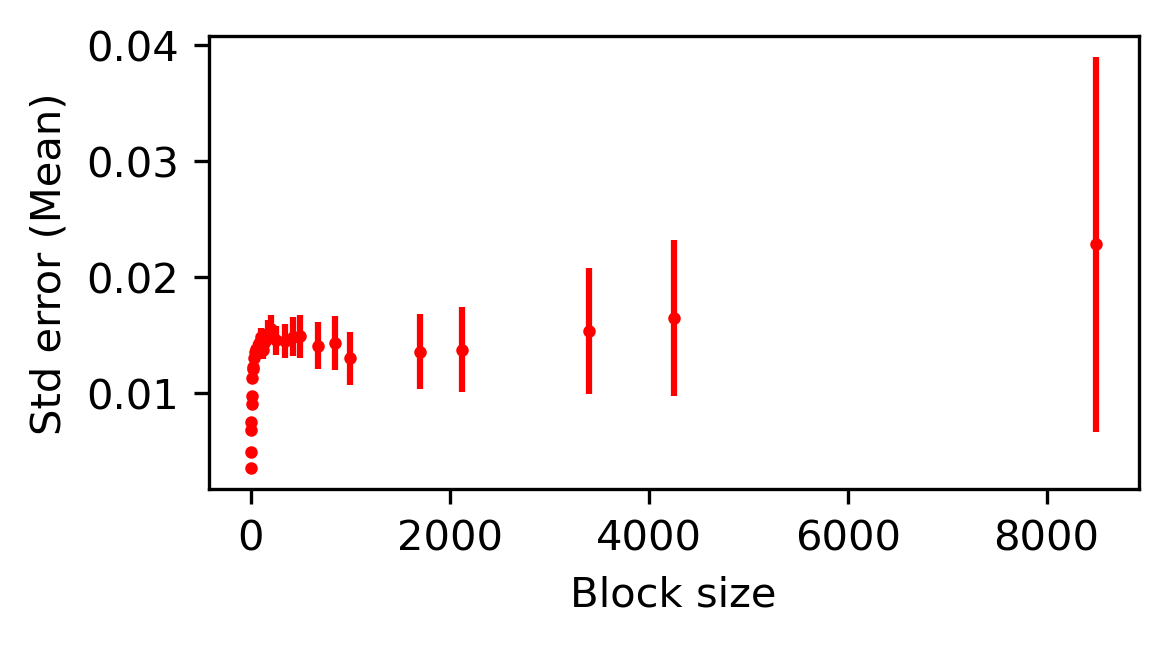

In [29]:
# Plotting the blocking result
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel('Block size')
plt.ylabel('Std error (Mean)')
plt.errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',ms=2)

In [20]:
# The function optimal_block estimate the block size for which data become uncorrelated
# and the corresponding error at the fixed point, the one you should use as uncertainty
# on your average
#
# Currently 2 methods are implemented. Look at the README.md for more details.
# I'll show you both.
corr_len1, err1 = block.optimal_block(len(dataset),blocks_stat,method="b3")
print("Correlation length: %i" %(corr_len1))
print("Mean of the dataset: %f" %(dataset.mean()))
print("Error on the mean: %f\n" %(err1))

Correlation length: 200
Mean of the dataset: 2.161809
Error on the mean: 0.015528



In [21]:
corr_len2, err2 = block.optimal_block(len(dataset),blocks_stat,method="knee_loc")
print("Correlation length: %i" %(corr_len1))
print("Mean of the dataset: %f" %(dataset.mean()))
print("Error on the mean: %f" %(err1))

Correlation length: 200
Mean of the dataset: 2.161809
Error on the mean: 0.015528


Text(500, 0.03, 'Correlation length')

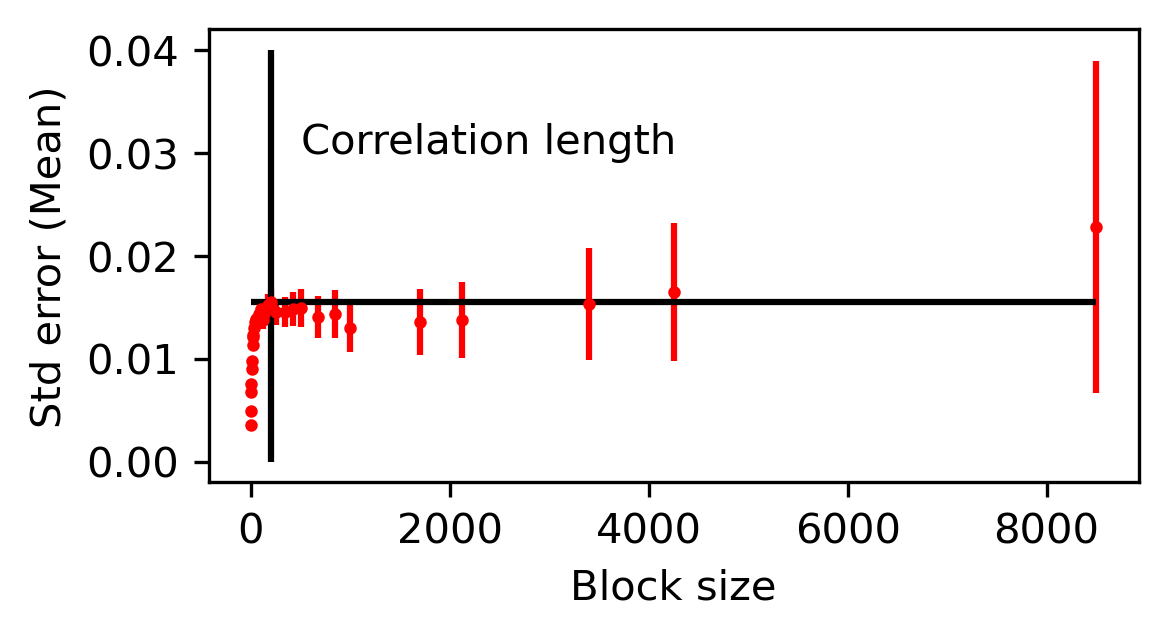

In [30]:
# On this dataset the 2 methods provide the same results. I had experience with the "b3"
# cracking, so right now I would suggest you to use the "knee_loc" method.
# Beware this part is still in development, so please always try both methods and visually
# check your results. If you do so, please inform me if you are happy or not about the 
# predictions. Especially if the results don't look like meaningful.

plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel('Block size')
plt.ylabel('Std error (Mean)')
plt.errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',ms=2)
plt.vlines(corr_len2,0,0.04)
plt.hlines(err2,0,8500)
plt.text(500,0.03,'Correlation length')